In [6]:
import os

import chainer
from chainer import configuration
from chainer.dataset import convert
import chainer.links as L
import chainer.functions as F
from chainer import serializers

import math
import numpy as np
import cupy as cp
import random

import sklearn
from sklearn.utils import shuffle
import pickle

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import import_ipynb
import dnn_prog_model0
from dnn_prog_model0 import directory1, directory2, gpu_id, curriculum, batchsize
from dnn_prog_model0 import dnn1

import pandas as pd

## Check training progress
Load the losses and accuracies for both the training and testing results.

In [84]:
import pickle
source = directory1
#source = 'dnn1_curr02_snapshot//epoch000410' 
training_accu1 = pickle.load(open(os.path.join(source,'training_accu1.pkl'),"rb"))
testing_accu1 = pickle.load(open(os.path.join(source,"testing_accu1.pkl"),"rb"))
training_loss1 = pickle.load(open(os.path.join(source,"training_loss1.pkl"),"rb"))
testing_loss1 = pickle.load(open(os.path.join(source,"testing_loss1.pkl"),"rb"))
print('curriculum: {:02d}'.format(curriculum), '       batchsize: {:04d}'.format(batchsize))
print('recent epoch:', len(training_accu1))
 
print('baseline random model:{: .06f}'.format(1/(curriculum+3)))
print('MPL1 train_accu:{: .06f}'.format(float(training_accu1[len(training_accu1)-1])), '  MPL1 test_accu:{: .06f}'.format(float(testing_accu1[len(testing_accu1)-1])))

drop = float(training_accu1[len(training_accu1)-1]) - float(training_accu1[len(training_accu1)-2])
if drop<0:
    print('accuracy decrease by:{: .06f}'.format(drop))
elif drop>0:
    print('accuracy increase by:{: .06f}'.format(drop))
elif drop == 0:
    print('no change')
print()    
#print('MPL1 train_loss:{: .06f}'.format(float(training_loss1[len(training_loss1)-1])), '  MPL1 test_loss:{: .06f}'.format(float(testing_loss1[len(testing_loss1)-1])))    


curriculum: 32        batchsize: 1536
recent epoch: 31181
baseline random model: 0.028571
MPL1 train_accu: 0.726589   MPL1 test_accu: 0.753006
accuracy decrease by:-0.000007



In [82]:
min_y = 0.59999
max_y = 0.89999 

min_x = 31040
max_x = len(training_accu1)+10

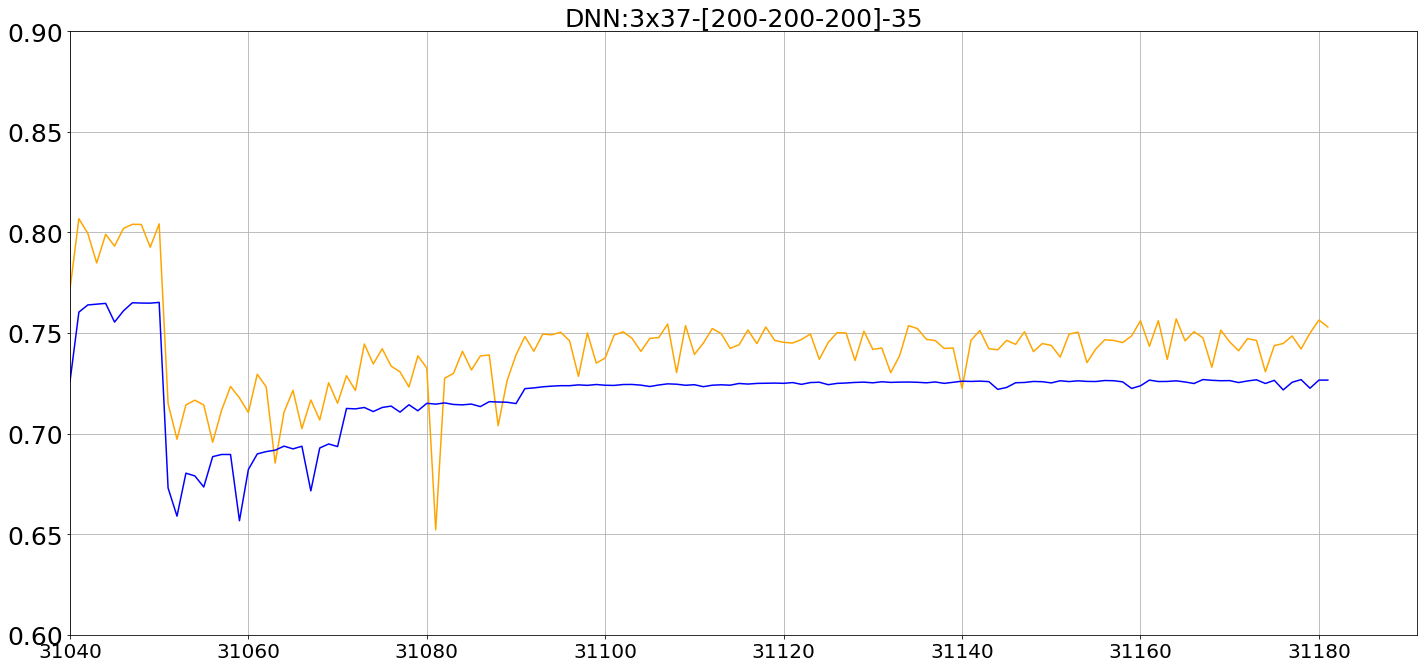

In [83]:
#%matplotlib qt
#%matplotlib inline
font_set_size = 25
font_set_size2 = 20
fig = plt.figure(figsize=(20,15)) #empty figure with nothing

#first ow
plt.subplot(331).set_ylim(min_y,max_y)
plt.subplot(331).set_xlim(min_x,max_x)
test = plt.plot([0]+testing_accu1,'orange')
train = plt.plot([0]+training_accu1,'blue')
plt.title('DNN:3x37-'+dnn1.desc+'-35',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)


plt.subplots_adjust(top=2.00, bottom=0.1, left=0.10, right=3.00, 
                    hspace=0.2, wspace=0.05) #spaces in between 'aka:cross'

plt.show()